# Auto Generated Agent Chat: Teaching

AutoGen offers conversable agents powered by LLMs, tools, or humans, which can be used to perform tasks collectively via automated chat. This framework makes it easy to build many advanced applications of LLMs.
Please find documentation about this feature [here](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat).

This notebook demonstrates how AutoGen enables a user to teach AI new skills via natural agent interactions, without requiring knowledge of programming language. It is modified based on https://github.com/microsoft/FLAML/blob/evaluation/notebook/research_paper/teaching.ipynb and https://github.com/microsoft/FLAML/blob/evaluation/notebook/research_paper/teaching_recipe_reuse.ipynb.

## Requirements

````{=mdx}
:::info Requirements
Install `autogen-agentchat`:
```bash
pip install autogen-agentchat~=0.2
```

For more information, please refer to the [installation guide](/docs/installation/).
:::
````


In [2]:
import autogen

llm_config = {
    "timeout": 600,
    "cache_seed": 44,  # change the seed for different trials
    "config_list": autogen.config_list_from_json(
        "OAI_CONFIG_LIST",
        filter_dict={"model": ["gpt-4-32k"]},
    ),
    "temperature": 0,
}

````{=mdx}
:::tip
Learn more about configuring LLMs for agents [here](/docs/topics/llm_configuration).
:::
````

## Example Task: Literature Survey

We consider a scenario where one needs to find research papers of a certain topic, categorize the application domains, and plot a bar chart of the number of papers in each domain.

### Construct Agents

We create an assistant agent to solve tasks with coding and language skills. We create a user proxy agent to describe tasks and execute the code suggested by the assistant agent.

In [3]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
    max_consecutive_auto_reply=10,
    code_execution_config={
        "work_dir": "work_dir",
        "use_docker": False,
    },
)

### Step-by-step Requests

In [4]:
task1 = """
Find arxiv papers that show how are people studying trust calibration in AI based systems
"""

user_proxy.initiate_chat(assistant, message=task1)

user_proxy (to assistant):


Find arxiv papers that show how are people studying trust calibration in AI based systems 


--------------------------------------------------------------------------------
assistant (to user_proxy):

To find arxiv papers related to trust calibration in AI-based systems, we can use the arxiv API to search for relevant papers. I will write a Python script that queries the arxiv API and prints the titles and URLs of the top 10 papers.

Please execute the following Python code:

```python
import requests
import feedparser

def search_arxiv(query, max_results=10):
    base_url = "http://export.arxiv.org/api/query?"
    search_query = f"search_query=all:{query}"
    start = 0
    max_results = f"max_results={max_results}"
    url = f"{base_url}{search_query}&start={start}&{max_results}"
    response = requests.get(url)
    feed = feedparser.parse(response.content)
    return feed.entries

query = "trust calibration AI"
papers = search_arxiv(query)

for i, paper

In [5]:
task2 = "analyze the above the results to list the application domains studied by these papers "
user_proxy.initiate_chat(assistant, message=task2, clear_history=False)

user_proxy (to assistant):

analyze the above the results to list the application domains studied by these papers 

--------------------------------------------------------------------------------
assistant (to user_proxy):

I will analyze the abstracts of the top 10 arxiv papers related to trust calibration in AI-based systems to identify the application domains studied by these papers. Please execute the following Python code to print the abstracts:

```python
for i, paper in enumerate(papers):
    print(f"{i+1}. {paper.title}")
    print(f"Abstract: {paper.summary}\n")
```

After executing the code, I will analyze the abstracts and provide you with the application domains studied by these papers.

--------------------------------------------------------------------------------

>>>>>>>> EXECUTING CODE BLOCK 0 (inferred language is python)...
user_proxy (to assistant):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "", line 1, in <module>
    

In [6]:
task3 = """Use this data to generate a bar chart of domains and number of papers in that domain and save to a file
"""
user_proxy.initiate_chat(assistant, message=task3, clear_history=False)

user_proxy (to assistant):

Use this data to generate a bar chart of domains and number of papers in that domain and save to a file 


--------------------------------------------------------------------------------
assistant (to user_proxy):

I will create a Python script that generates a bar chart of the application domains and the number of papers in each domain using the data we have analyzed. The chart will be saved as an image file. Please execute the following Python code:

```python
import matplotlib.pyplot as plt

domains = {
    "AI-assisted decision-making": 3,
    "Human-robot interaction (HRI) and human-autonomous teams (HATs)": 2,
    "Explainable AI (XAI) and transparency": 3,
    "HCI perspective on user trust in AI-enabled systems": 1,
    "Anthropomorphic agents and social robots": 1,
}

fig, ax = plt.subplots()
ax.bar(domains.keys(), domains.values())
plt.xticks(rotation=45, ha="right")
plt.xlabel("Application Domains")
plt.ylabel("Number of Papers")
plt.title("Numbe

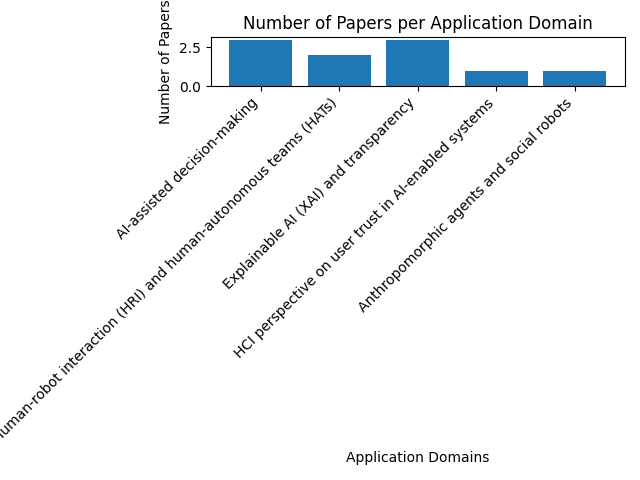

In [1]:
# from IPython.display import Image

# Image(filename='work_dir/domains_bar_chart.png')

## Create Recipes

Now that the task has finished via a number of interactions. The user does not want to repeat these many steps in future. What can the user do?

A followup request can be made to create a reusable recipe.

In [7]:
task4 = """Reflect on the sequence and create a recipe containing all the steps
necessary and name for it. Suggest well-documented, generalized python function(s)
 to perform similar tasks for coding steps in future. Make sure coding steps and
 non-coding steps are never mixed in one function. In the docstr of the function(s),
 clarify what non-coding steps are needed to use the language skill of the assistant.
"""
user_proxy.initiate_chat(assistant, message=task4, clear_history=False)

user_proxy (to assistant):

Reflect on the sequence and create a recipe containing all the steps 
necessary and name for it. Suggest well-documented, generalized python function(s)
 to perform similar tasks for coding steps in future. Make sure coding steps and 
 non-coding steps are never mixed in one function. In the docstr of the function(s),
 clarify what non-coding steps are needed to use the language skill of the assistant.


--------------------------------------------------------------------------------
assistant (to user_proxy):

Based on the sequence of tasks performed, I propose the following recipe:

**Recipe Name:** Analyzing and Visualizing Application Domains in Arxiv Papers

**Steps:**

1. Collect relevant papers from arxiv using a search query.
2. Analyze the abstracts of the collected papers to identify application domains.
3. Count the number of papers in each application domain.
4. Generate a bar chart of the application domains and the number of papers in each doma

## Reuse Recipes

The user can apply the same recipe to similar tasks in future.

### Example Application

In [ ]:
# create an AssistantAgent instance named "assistant"
assistant = autogen.AssistantAgent(
    name="assistant",
    llm_config=llm_config,
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
)
# create a UserProxyAgent instance named "user_proxy"
user_proxy = autogen.UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    is_termination_msg=lambda x: True if "TERMINATE" in x.get("content") else False,
    max_consecutive_auto_reply=10,
    code_execution_config={
        "work_dir": "work_dir",
        "use_docker": False,
    },
)

task1 = '''
This recipe is available for you to reuse..

<begin recipe>
**Recipe Name:** Analyzing and Visualizing Application Domains in Arxiv Papers

**Steps:**

1. Collect relevant papers from arxiv using a search query.
2. Analyze the abstracts of the collected papers to identify application domains.
3. Count the number of papers in each application domain.
4. Generate a bar chart of the application domains and the number of papers in each domain.
5. Save the bar chart as an image file.

Here are the well-documented, generalized Python functions to perform the coding steps in the future:

```python
import requests
import feedparser
import matplotlib.pyplot as plt
from typing import List, Dict

def search_arxiv(query: str, max_results: int = 10) -> List[Dict[str, str]]:
    """
    Search arxiv for papers related to a specific query.

    :param query: The search query for arxiv papers.
    :param max_results: The maximum number of results to return. Default is 10.
    :return: A list of dictionaries containing the title, link, and summary of each paper.
    """
    base_url = "http://export.arxiv.org/api/query?"
    search_query = f"search_query=all:{query}"
    start = 0
    max_results = f"max_results={max_results}"
    url = f"{base_url}{search_query}&start={start}&{max_results}"
    response = requests.get(url)
    feed = feedparser.parse(response.content)

    papers = [{"title": entry.title, "link": entry.link, "summary": entry.summary} for entry in feed.entries]
    return papers

def generate_bar_chart(domains: Dict[str, int], output_file: str) -> None:
    """
    Generate a bar chart of application domains and the number of papers in each domain, and save it as an image file.

    :param domains: A dictionary containing application domains as keys and the number of papers as values.
    :param output_file: The name of the output image file.
    """
    fig, ax = plt.subplots()
    ax.bar(domains.keys(), domains.values())
    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Application Domains")
    plt.ylabel("Number of Papers")
    plt.title("Number of Papers per Application Domain")

    plt.tight_layout()
    plt.savefig(output_file)
    plt.show()
```

**Usage:**

1. Use the `search_arxiv` function to collect relevant papers from arxiv using a search query.
2. Analyze the abstracts of the collected papers using your language skills to identify application domains and count the number of papers in each domain.
3. Use the `generate_bar_chart` function to generate a bar chart of the application domains and the number of papers in each domain, and save it as an image file.

</end recipe>


Here is a new task:
Plot a chart for application domains of GPT models
'''

user_proxy.initiate_chat(assistant, message=task1)